In [65]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("/content/drive/MyDrive/ML/USA_Housing.csv", sep =",")

In [68]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [69]:
df.columns = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price' , 'Address']
names = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price']
for i in names:
    df[i] = (df[i] - min(df[i])) / (max(df[i]) - min(df[i]))
df.head()

,Income,Age,No_rooms,No_bedrooms,Population,Price,Address
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384,USS Barnett\nFPO AP 44820
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702,USNS Raymond\nFPO AE 09386


In [70]:
df.corr()

,Income,Age,No_rooms,No_bedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
No_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
No_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


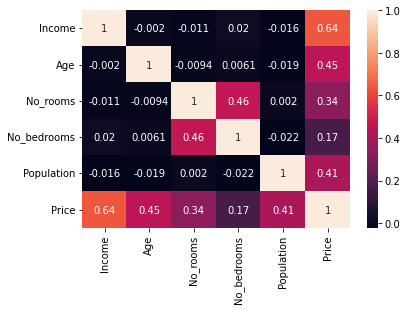

In [71]:
sns.heatmap(df.corr(), annot=True)

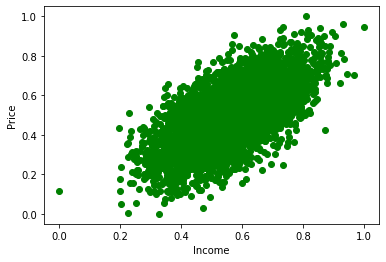

In [72]:
# Biểu diễn dữ liệu
plt.plot(df['Income'], df['Price'], 'go')
plt.xlabel('Income')
plt.ylabel('Price')
plt.show()


In [73]:
# Loại bỏ các giá trị ngoại lai:
# Tính IQR
q1 = df['Income'].quantile(q=0.25)
q3 = df['Income'].quantile(q=0.75)
iqr = q3 - q1
# Tính cận trên, cận dưới
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
# Loại bỏ outlier
df = df[(df['Income']>lower) & (df['Income']<upper)]

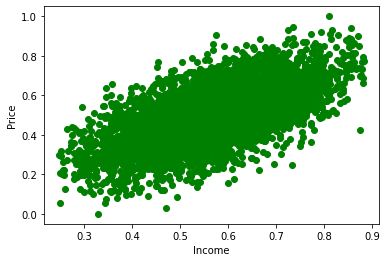

In [74]:
# Biểu diễn dữ liệu sau khi loại bỏ outlier
plt.plot(df['Income'], df['Price'], 'go')
plt.xlabel('Income')
plt.ylabel('Price')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
df_train, df_test = train_test_split(df,test_size=0.2)


In [76]:
X = df_train["Income"]
y = df_train['Price']

In [77]:
y = np.array(y)
y = y.reshape(y.shape[0], 1)

X = np.array(X)
X = X.reshape(X.shape[0], 1)
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis =1)

In [78]:
A = np.dot(Xbar.T, Xbar) 
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w0 = w[0][0]
w1 = w[1][0]
w

array([[0.05751174],
       [0.77563527]])

In [79]:
X_test=np.array(df_test['Income']).reshape(-1,1)
y_test=np.array(df_test['Price']).reshape(-1,1)
y_pred=w0+w1*X_test


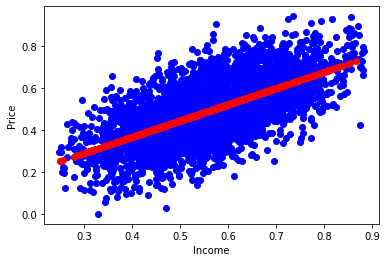

In [80]:
# Drawing the fitting line 
plt.plot(X.T, y.T, 'bo') 
plt.plot(X_test, y_pred, 'ro')
plt.xlabel('Income')
plt.ylabel('Price')
plt.show()

In [81]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(np.array(df_train['Income']).reshape(-1,1), df_train['Price'])
print(regr.coef_ )

[0.77563527]


In [82]:
print(regr.intercept_)

0.05751173814521071


In [83]:
y_predict= regr.predict(np.array(X_test).reshape(-1,1))


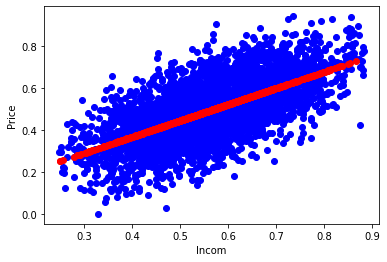

In [84]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'bo')
plt.plot(X_test.reshape(-1,1) , y_predict, 'ro') # data
plt.xlabel('Incom')
plt.ylabel('Price')
plt.show()

In [86]:
#Cách sklearn
print(metrics.mean_absolute_error(y_test, y_predict))
#Cách sử dụng công thức toán
print(metrics.mean_absolute_error(y_test, y_pred))

0.0903708970084246
0.0903708970084246


Nhận xét: Ta có MAE = 9,04% nên sự khác biệt trung bình giữa các giá trị dự đoán và giá trị thực tế là khá nhỏ. Do đó mô hình hoạt động khá tốt